# Resolução da 1.ª prova de Inteligência Artificial.

![1ª Questão](Questões/Q1.png)

### Agente comentarista de Jogo:

#### Medida de desempenho:
Quantidades de pessoas assistindo à transmissão.
#### Ambiente:
Transmissão por rádio, TV ou _internet_ de um jogo.
#### Atuadores:
Microfone para simular a voz de um narrador.
#### Sensores:
Câmera para ver o jogo.

### Agente sugestor de vinho:

#### Medida de desempenho:
_Feedback_ das pessoas que receberam a recomendação do vinho. Sendo possível dizer se gostou ou não do vinho sugerido (Sim ou não, uma resposta binária).
#### Ambiente:
Uma Adega de vinhos
#### Atuadores:
Uma tela para exibir o nome do vinho sugerido
#### Sensores:
Sensores degustativo para que a IA consiga obter informações sobre acidez, quantidade de alcohol, aroma e sabor.
Sensores térmicos para poder determinar se o vinho está na temperatura certa.

### Agente treinador de time:

#### Medida de desempenho:
Desempenho do time em jogos, isto é o placar final do jogo.
#### Ambiente:
Times de basquetes, futebol, futebol americano, etc.
#### Atuadores:
Tela para exibir as informações para os jogadores e treinador.
#### Sensores:
Sensores térmicos para ver a temperatura do corpo dos jogadores, sensores de CO₂ no sangue, sensores de velocidade para ver a velocidade em que os jogadores estão correndo, sensor que placar do jogo.

![2ª Questão](Questões/Q2.png)

Os quatro tipos são: supervisionado, não-supervisionado, semi-supervisionado e aprendizagem por reforço.
### Aprendizado Supervisionado
No aprendizado supervisionado a máquina recebe tanto as entradas como as saídas do banco de dados. Com isso, a máquina consegue criar uma função que mapeia as entradas com as saídas.

No caso do banco de dados escolhido. A máquina receberia como entradas os dados como idade, hipertensão, nível de glicose, e para as saídas ela receberia os resultados de derrame.

### Aprendizado Não-supervisionado
No aprendizado não-supervisionado a máquina só recebe os dados de entrada. Com eles ela cria grupos de elementos com características semelhantes.

Com o banco de dados. A máquina receberia as entradas escolhidas, e após gerar dois grupos de elementos, seria verificado se os grupos criados se relacionam com as saídas dos elementos. Isto é, se a maioria dos elementos teria o mesmo resultado de derrame.
### Aprendizado Semi-supervisionado

O aprendizado semi-supervisionado é uma mistura entre o supervisionado e o não-supervisionado, onde só algum dos elementos do grupo de aprendizado recebem as saídas. A máquina então, agruparia os elementos em grupos e usaria os elementos rotulados para prever as saídas.

No banco de dados, a máquina receberia uma amostra de aprendizado onde só alguns elementos teriam as informações de derrame. Ela então deve criar dois grupos rotulados correspondendo os resultados da coluna derrame.

### Aprendizado por reforço
No aprendizado por reforço a máquina aparece por recompensa. Isto é, a máquina possui algum tipo de pontuação, e quando ela acerta a pontuação sobe, caso contrário a pontuação desce.

Nesse caso, a máquina receberia um grupo de aprendizado sem os resultados das saídas, mas receberia que as saídas devem ser ou 1 para derrame ou 0 para não teve derrame. Conforme a máquina fosse tentando prever as saídas a sua pontuação iria ser aumentada para acerto e diminuía para erro.
### Base de Dados:
https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset



![3ª Questão](Questões/Q3.png)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas
import pandas_profiling
from sklearn import (ensemble, preprocessing, tree,)
from sklearn.model_selection import cross_val_score # Cross Validation Function.
from sklearn.model_selection import KFold # KFold Class.
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (auc, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, accuracy_score)
from sklearn.model_selection import (train_test_split, StratifiedKFold)

# Pré-processamento

In [2]:
dataframe = pandas.read_csv("dataset/healthcare-dataset-stroke-data.csv")
dataframe_original = dataframe
dataframe

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
print(dataframe_original.dtypes)
print(dataframe_original.shape)

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object
(5110, 12)


In [5]:
dataframe = dataframe.drop(columns=["id", "ever_married", "work_type", "Residence_type"])
dataframe = dataframe.dropna()
dataframe = dataframe[dataframe["smoking_status"].str.contains("Unknown")==False]
dataframe

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,105.92,32.5,never smoked,1
3,Female,49.0,0,0,171.23,34.4,smokes,1
4,Female,79.0,1,0,174.12,24.0,never smoked,1
5,Male,81.0,0,0,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...
5100,Male,82.0,1,0,71.97,28.3,never smoked,0
5102,Female,57.0,0,0,77.93,21.7,never smoked,0
5106,Female,81.0,0,0,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,82.99,30.6,never smoked,0


In [6]:
dataframe['gender'] = dataframe['gender'].map({'Male': 0, 'Female': 1})

dataframe['smoking_status'] = dataframe['smoking_status'].map({'never smoked': 0, 'formerly smoked': 1, 'smokes': 2})
dataframe = dataframe.dropna()
dataframe

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,0.0,67.0,0,1,228.69,36.6,1,1
2,0.0,80.0,0,1,105.92,32.5,0,1
3,1.0,49.0,0,0,171.23,34.4,2,1
4,1.0,79.0,1,0,174.12,24.0,0,1
5,0.0,81.0,0,0,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...
5100,0.0,82.0,1,0,71.97,28.3,0,0
5102,1.0,57.0,0,0,77.93,21.7,0,0
5106,1.0,81.0,0,0,125.20,40.0,0,0
5107,1.0,35.0,0,0,82.99,30.6,0,0


In [7]:
print("Valores faltando: \n", dataframe.isnull().sum())

Valores faltando: 
 gender               0
age                  0
hypertension         0
heart_disease        0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [8]:
print("valores duplicados: \n", dataframe.duplicated())

valores duplicados: 
 0       False
2       False
3       False
4       False
5       False
        ...  
5100    False
5102    False
5106    False
5107    False
5108    False
Length: 3425, dtype: bool


In [9]:
dataframe.mean()

gender                 0.609051
age                   48.652555
hypertension           0.119124
heart_disease          0.060146
avg_glucose_level    108.311670
bmi                   30.292350
smoking_status         0.674453
stroke                 0.052555
dtype: float64

In [10]:
correlacao = dataframe.corr()
correlacao.style.background_gradient(cmap="coolwarm")

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,-0.044580,-0.037853,-0.101834,-0.070169,-0.014284,-0.073409,-0.012413
age,-0.044580,1.000000,0.267030,0.260077,0.233974,0.079317,0.054104,0.242465
hypertension,-0.037853,0.267030,1.000000,0.111683,0.168769,0.132544,-0.001316,0.143626
heart_disease,-0.101834,0.260077,0.111683,1.000000,0.143152,0.001208,0.062549,0.138538
avg_glucose_level,-0.070169,0.233974,0.168769,0.143152,1.000000,0.156675,0.006199,0.140515
bmi,-0.014284,0.079317,0.132544,0.001208,0.156675,1.000000,0.037676,0.011601
smoking_status,-0.073409,0.054104,-0.001316,0.062549,0.006199,0.037676,1.000000,0.022071
stroke,-0.012413,0.242465,0.143626,0.138538,0.140515,0.011601,0.022071,1.000000


# Correlação

<b> remover a coluna de 'gender', 'bmi' e 'smoking_status' porque a correlação entre elas e o objetivo é tão baixa que elas não influenciam o suficiente para chegar em algum resultado. </b>

In [11]:
dataframe = dataframe.drop(columns=["gender", "bmi", "smoking_status"])

In [12]:
# pandas_profiling.ProfileReport(dataframe)

In [14]:
y = dataframe["stroke"]
# X = dataframe.drop(columns="stroke")
X = dataframe
X

,age,hypertension,heart_disease,avg_glucose_level,stroke
0,67.0,0,1,228.69,1
2,80.0,0,1,105.92,1
3,49.0,0,0,171.23,1
4,79.0,1,0,174.12,1
5,81.0,0,0,186.21,1
...,...,...,...,...,...
5100,82.0,1,0,71.97,0
5102,57.0,0,0,77.93,0
5106,81.0,0,0,125.20,0
5107,35.0,0,0,82.99,0


# Executando KNN

In [15]:
# HoldOut
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [16]:
X_train

,age,hypertension,heart_disease,avg_glucose_level,stroke
1878,63.0,0,0,104.70,0
2513,28.0,0,0,75.50,0
211,51.0,0,0,103.43,1
2110,77.0,0,1,102.96,0
1262,67.0,0,0,113.34,0
...,...,...,...,...,...
4762,76.0,1,0,78.68,0
1977,26.0,0,0,70.61,0
749,55.0,0,0,65.12,0
4765,76.0,1,0,63.28,0


In [17]:
X_test

,age,hypertension,heart_disease,avg_glucose_level,stroke
2211,41.0,0,0,89.14,0
4819,82.0,0,0,113.45,0
2115,49.0,0,0,114.76,0
3639,51.0,1,0,85.84,0
2664,47.0,0,0,95.04,0
...,...,...,...,...,...
4144,54.0,0,0,110.38,0
4509,16.0,0,0,82.95,0
4463,54.0,0,0,89.41,0
3799,40.0,0,0,92.35,0


In [18]:
y_train

1878    0
2513    0
211     1
2110    0
1262    0
       ..
4762    0
1977    0
749     0
4765    0
1892    0
Name: stroke, Length: 2397, dtype: int64

In [19]:
y_test

2211    0
4819    0
2115    0
3639    0
2664    0
       ..
4144    0
4509    0
4463    0
3799    0
144     1
Name: stroke, Length: 1028, dtype: int64

In [23]:
# Cross Validation
knc = KNeighborsClassifier()
kns = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)


kfold  = KFold(n_splits=5, shuffle=True)
result = cross_val_score(knc, X, y, cv = kns)


print("K-Fold (R^2) Resultados: {0}".format(result))
print("Media R^2 para Cross-Validation K-Fold: {:.3}".format(result.mean()))


K-Fold (R^2) Resultados: [0.94160584 0.94452555 0.9459854  0.94452555 0.94306569]
Media R^2 para Cross-Validation K-Fold: 0.944


## k = 1


In [24]:
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)
resultado = knc.predict(X_test)

KNeighborsClassifier(algorithm="auto", n_neighbors=1)

print("knn score = ", knc.score(X_test, y_test))
#print("knn resultado = ", resultado)

knn score =  0.943579766536965


knn score =  0.943579766536965
knn resultado =  [0 0 0 ... 0 0 1]
acurácia =  0.933852140077821
Sensibilidade =  0.25862068965517243
precisão =  0.375


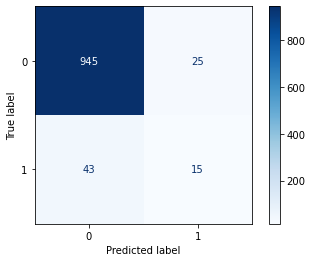

In [25]:
import matplotlib
matplotlib.use('module://matplotlib_inline.backend_inline')

knn = KNeighborsClassifier(n_neighbors=1, algorithm="auto")
knn.fit(X_train, y_train)
resultKNN = knn.predict(X_test)

print("knn score = ", knc.score(X_test, y_test))
print("knn resultado = ", resultKNN)

print("acurácia = ", accuracy_score(y_test, resultKNN))
print("Sensibilidade = ", recall_score(y_test, resultKNN))
print("precisão = ", precision_score(y_test, resultKNN))


matrizConfusao = confusion_matrix(y_test, resultKNN)
cs = confusion_matrix(y_test, resultKNN)
disp = ConfusionMatrixDisplay(cs)
disp.plot(cmap=plt.cm.Blues)
plt.show()

## K = 2

knn score =  0.943579766536965
acurácia =  0.943579766536965
Sensibilidade =  0.05172413793103448
precisão =  0.5


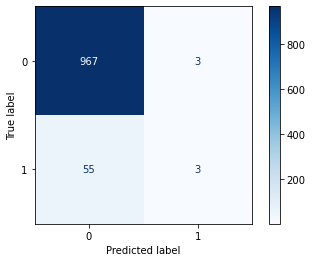

In [26]:
knn = KNeighborsClassifier(n_neighbors=2, algorithm="auto")
knn.fit(X_train, y_train)
resultKNN = knn.predict(X_test)

print("knn score = ", knc.score(X_test, y_test))

print("acurácia = ", accuracy_score(y_test, resultado))
print("Sensibilidade = ", recall_score(y_test, resultado))
print("precisão = ", precision_score(y_test, resultado))


matrizConfusao = confusion_matrix(y_test, resultKNN)
cs = confusion_matrix(y_test, resultado)
disp = ConfusionMatrixDisplay(cs)
disp.plot(cmap=plt.cm.Blues)
plt.show()

## k = 3

knn score =  0.943579766536965
knn resultado =  [0 0 0 ... 0 0 1]
acurácia =  0.943579766536965
Sensibilidade =  0.05172413793103448
precisão =  0.5


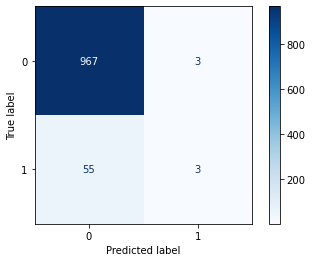

In [27]:
knn = KNeighborsClassifier(n_neighbors=3, algorithm="auto")
knn.fit(X_train, y_train)
resultKNN = knn.predict(X_test)

print("knn score = ", knc.score(X_test, y_test))
print("knn resultado = ", resultado)

print("acurácia = ", accuracy_score(y_test, resultado))
print("Sensibilidade = ", recall_score(y_test, resultado))
print("precisão = ", precision_score(y_test, resultado))


matrizConfusao = confusion_matrix(y_test, resultKNN)
cs = confusion_matrix(y_test, resultado)
disp = ConfusionMatrixDisplay(cs)
disp.plot(cmap=plt.cm.Blues)
plt.show()

## k = 4

knn score =  0.943579766536965
knn resultado =  [0 0 0 ... 0 0 1]
acurácia =  0.943579766536965
Sensibilidade =  0.05172413793103448
precisão =  0.5


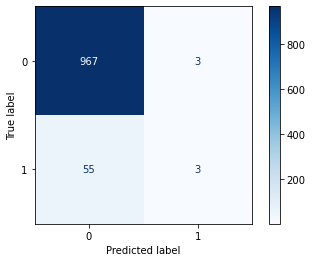

In [28]:
knn = KNeighborsClassifier(n_neighbors=4, algorithm="auto")
knn.fit(X_train, y_train)
resultKNN = knn.predict(X_test)

print("knn score = ", knc.score(X_test, y_test))
print("knn resultado = ", resultado)

print("acurácia = ", accuracy_score(y_test, resultado))
print("Sensibilidade = ", recall_score(y_test, resultado))
print("precisão = ", precision_score(y_test, resultado))


matrizConfusao = confusion_matrix(y_test, resultKNN)
cs = confusion_matrix(y_test, resultado)
disp = ConfusionMatrixDisplay(cs)
disp.plot(cmap=plt.cm.Blues)
plt.show()

## k = 5

knn score =  0.943579766536965
knn resultado =  [0 0 0 ... 0 0 1]
acurácia =  0.943579766536965
Sensibilidade =  0.05172413793103448
precisão =  0.5


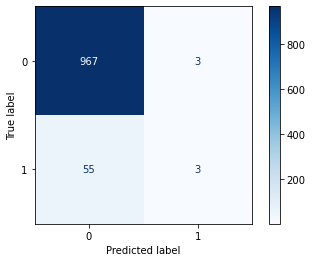

In [29]:
knn = KNeighborsClassifier(n_neighbors=5, algorithm="auto")
knn.fit(X_train, y_train)
resultKNN = knn.predict(X_test)

print("knn score = ", knc.score(X_test, y_test))
print("knn resultado = ", resultado)

print("acurácia = ", accuracy_score(y_test, resultado))
print("Sensibilidade = ", recall_score(y_test, resultado))
print("precisão = ", precision_score(y_test, resultado))


matrizConfusao = confusion_matrix(y_test, resultKNN)
cs = confusion_matrix(y_test, resultado)
disp = ConfusionMatrixDisplay(cs)
disp.plot(cmap=plt.cm.Blues)
plt.show()

## Análise
<b>É possível ver que para todos os k escolhidos embora a métrica de acurácia tenha sido alta, a métrica de sensibilidade e precisão estão bem baixas.
A sensibilidade demonstra quantas previsões verdadeiras estavam corretas, e a precisão mostra quantas previsões estavam corretas. Analisando os dados é possível ver que o banco de dados está enviesado para a classe de 'não hove derrame'.
É possível ver na tabela de confusão, que o número de falso positivo é muito alto, algo que não é desejável no caso de derrame.
É necessário fazer um balanceamento de dados, através da técnica de 'under sampling'.<\b>


knn score =  0.6574074074074074
knn resultado =  [0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 0 1 1 1 0
 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 1 1 0]
acurácia =  0.7037037037037037
Sensibilidade =  0.5925925925925926
precisão =  0.7619047619047619


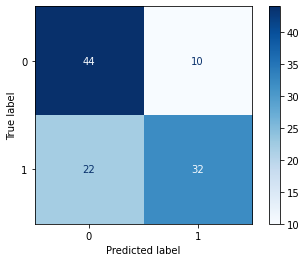

In [42]:
from imblearn.under_sampling import NearMiss
nm1 = NearMiss(version=1)

X_resampled_nm1, y_resampled_nm1 = nm1.fit_resample(X, y)

Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_resampled_nm1, y_resampled_nm1, test_size=0.3, random_state=10)



knn = KNeighborsClassifier(n_neighbors=1, algorithm="auto") #k vizinhos mais próximos = n_neighbors
knn.fit(Xr_train, yr_train)
resultKNN = knn.predict(Xr_test)


print("knn score = ", knc.score(Xr_test, yr_test))
print("knn resultado = ", resultKNN)

print("acurácia = ", accuracy_score(yr_test, resultKNN))
print("Sensibilidade = ", recall_score(yr_test, resultKNN))
print("precisão = ", precision_score(yr_test, resultKNN))


matrizConfusao = confusion_matrix(yr_test, resultKNN)
cs = confusion_matrix(yr_test, resultKNN)
disp = ConfusionMatrixDisplay(cs)
disp.plot(cmap=plt.cm.Blues)
plt.show()

<b>Embora a acurácia diminuiu bastante, a precisão e sensibilidade aumentaram muito. Implementando a validação cruzado é possível chegar em resultados melhores.
É bem visível que o número de falsos positivos diminuiu e o número de verdadeiros positivos aumentou, algo que é desejável. Embora o modelo tenha uma acurácia menor, ela está errando menos nos casos que houve derrame, o desejável nesse caso.</b>

In [60]:
def media(x):
    __a = 0
    for el in x:
        __a += el
    return __a / len(x)


In [63]:
# Cross Validation
knc = KNeighborsClassifier()
kns = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)


kfold  = KFold(n_splits=5, shuffle=True)
result = cross_val_score(knc, X_resampled_nm1, y_resampled_nm1, cv = kns)

a = kns.split(X_resampled_nm1, y_resampled_nm1)

resultado = []
acuracia = []
sensibilidade = []
precisao = []

for train_index, test_index in a:
    Xr_train, Xr_test = X_resampled_nm1.iloc[train_index], X_resampled_nm1.iloc[test_index]
    yr_train, yr_test = y_resampled_nm1.iloc[train_index], y_resampled_nm1.iloc[test_index]

    knn.fit(Xr_train, yr_train)
    resultado.append(knn.predict(Xr_test))
    acuracia.append(accuracy_score(yr_test, knn.predict(Xr_test)))
    sensibilidade.append(recall_score(yr_test, knn.predict(Xr_test)))
    precisao.append(precision_score(yr_test, knn.predict(Xr_test)))


print(media(acuracia))
print(media(sensibilidade))
print(media(precisao))


0.7055555555555555
0.6
0.7601012192316541


![4ª Questão](Questões/Q4.png)

O banco de dados aparenta estar desbalanceado. Para melhorar os resultados é necessário balancear o banco de dados, para isso, na criação das amostras de treino e teste basta utilizar o método de amostragem estratificada. Usar também a técnica 'NearMiss' de 'under sampling' para melhores resultado.
Para chegar aos resultados das métricas é necessário reduzir a quantidade de classes da matriz confusão para 2.


![matriz confusão](Questões/matriz_confusao.png)

Nos dados passados os dados verdadeiros são as colunas e os dados preditos são as linhas.

Para fazer uma matriz de confusão para as <b>maças</b> teremos que:

[PV] os valores positivo verdadeiro são : 70 (Previu que era maça e realmente era maça )

[PF] valores positivo falsos são        : 30 (Previu que era maça, mas não era maça )

[NV] os valores negativo verdadeiro são : 1122 (Previu que não era maça e realmente não era maça )

[NF] os valores negativo falso são      : 20 (Previu que não era maça, mas era maça)


Para fazer uma matriz de confusão para as <b>laranjas</b> teremos que:

[PV] os valores positivo verdadeiro são : 67

[PF] os valores positivo falsos são     : 33

[NV] os valores negativo verdadeiro são : 1125

[NF] os valores negativo falso são      : 54

Para fazer uma matriz de confusão para os <b>limões</b> teremos que:

[PV] os valores positivo verdadeiro são : 55

[PF] os valores positivo falsos são     : 45

[NV] os valores negativo verdadeiro são : 1137

[NF] os valores negativo falso são      : 10

Para fazer uma matriz de confusão para as <b>mangas</b> teremos que:

[PV] os valores positivo verdadeiro são : 1000

[PF] os valores positivo falsos são     : 11

[NV] os valores negativo verdadeiro são : 192

[NF] os valores negativo falso são      : 35

![Matrizes Confusão Binário](Questões/matrizes_confusão_binário.png)

## Medidas das classes isoladas
### - Maça
#### Sensibilidade:
$ sensibilidade = \frac{PV}{PV + NF} = $
$ \frac{70}{70 + 20} = 0,777 $

#### Especificidade:
$ especifidade = \frac{NV}{NV + PF} = $
$ \frac{1122}{1122 + 30} = 0,973 $

#### Precisão:
$ precisão = \frac{PV}{PV + PF} = $
$ \frac{70}{70 + 30} = 0,700 $

#### Medida F1:
$ F1 = 2 * \frac{precisão * sensibilidade}{precisão + sensibilidade} = $
$2 * \frac{0,959 * 0,777}{0,959 +0,777} = 0,858$

#### Acurácia:
$ acuracia = \frac{VP + VN}{VP + VN + PF + PV} = $
$ \frac{70 + 1122}{70 + 20 + 30 + 1122} = 0,959 $

#### Coeficiente de Matthews:
$ MCC = \frac{VP * VN - FP * FN}{\sqrt{(VP+FP)*(VP+FN)*(VN+FP)*(NV+FN)}} = $
$ \frac{70 * 1122 - 30 * 20}{\sqrt{(70+30)*(70+20)*(1122+30)*(1122+20)}} = 0,716 $

#### ROC AUC:
AUC = 0,875

___
### - Laranja
#### Sensibilidade:
$ sensibilidade = \frac{PV}{PV + NF} = $
$ \frac{67}{67 + 54} = 0,553 $

#### Especificidade:
$ especifidade = \frac{NV}{NV + PF} = $
$ \frac{1125}{1125 + 33} = 0,971 $

#### Precisão:
$ precisão = \frac{PV}{PV + PF} = $
$ \frac{67}{67 + 33} = 0,670 $

#### Medida F1:
$ F1 = 2 * \frac{precisão * sensibilidade}{precisão + sensibilidade} = $
$2 * \frac{0,670 * 0,553}{0,670 + 0,553} = 0,605$

#### Acurácia:
$ acuracia = \frac{VP + VN}{VP + VN + PF + PV} = $
$ \frac{67 + 1125}{67 + 54 + 33 + 1125} = 0,931 $

#### Coeficiente de Matthews:
$ MCC = \frac{VP * VN - FP * FN}{\sqrt{(VP+FP)*(VP+FN)*(VN+FP)*(NV+FN)}} = $
$ MCC = \frac{67 * 1125 - 33 * 54}{\sqrt{(67+33)*(67+54)*(1125+33)*(1125+54)}} = 0,572 $

#### ROC AUC:
AUC = 0,762

___
### - Limão
#### Sensibilidade:
$ sensibilidade = \frac{PV}{PV + NF} = $
$ \frac{55}{55 + 10} = 0,846 $

#### Especificidade:
$ especifidade = \frac{NV}{NV + PF} = $
$ \frac{1137}{1137 + 45} = 0,961 $

#### Precisão:
$ precisão = \frac{PV}{PV + PF} = $
$ \frac{55}{55 + 45} = 0,550 $

#### Medida F1:
$ F1 = 2 * \frac{precisão * sensibilidade}{precisão + sensibilidade} = $
$2 * \frac{0,550 * 0,846}{0,550 +0,846} = 0,666$

#### Acurácia:
$ acuracia = \frac{VP + VN}{VP + VN + PF + PV} = $
$ \frac{55 + 1137}{55 + 10 + 45 + 1137} = 0,955 $

#### Coeficiente de Matthews:
$ MCC = \frac{VP * VN - FP * FN}{\sqrt{(VP+FP)*(VP+FN)*(VN+FP)*(NV+FN)}} = $
$ \frac{55 * 1137 - 45 * 10}{\sqrt{(55+45)*(55+10)*(1137+45)*(1137+10)}} = 0,661 $

#### ROC AUC:
AUC = 0.904

___
### - Manga
#### Sensibilidade:
$ sensibilidade = \frac{PV}{PV + NF} = $
$ \frac{1000}{1000 + 35} = 0,966 $

#### Especificidade:
$ especifidade = \frac{NV}{NV + PF} = $
$ \frac{192}{192 + 11} = 0,945 $

#### Precisão:
$ precisão = \frac{PV}{PV + PF} = $
$ \frac{1000}{1000 + 11} = 0,989 $

#### Medida F1:
$ F1 = 2 * \frac{precisão * sensibilidade}{precisão + sensibilidade} = $
$ 2 * \frac{0,989 * 0,966}{0,989 +0,966} = 0,9744 $

#### Acurácia:
$ acuracia = \frac{VP + VN}{VP + VN + PF + PV} = $
$ \frac{1000 + 192}{1000 + 35 + 11 + 192} = 0,962 $

#### Coeficiente de Matthews:
$ MCC = \frac{VP * VN - FP * FN}{\sqrt{(VP+FP)*(VP+FN)*(VN+FP)*(NV+FN)}} = $
$ MCC = \frac{1000 * 192 - 11 * 35}{\sqrt{(1000+11)*(1000+35)*(192+11)*(192+35)}} = 0,872 $

#### ROC AUC:
AUC = 0.955

ou transformar a matriz para que:
- Os Positivos Verdadeiros (VP) e Negativos Verdadeiros (NV) Sejam a Diagonal principal da matriz
- Os Positivo Falso (PF) ficarão na última linha da tabela enquanto os Negativo falsos (NF) irão para a última coluna a direita
![Matriz de Confusão Transformada](Questões/matriz_confusao_transformada.png)

![Questão Extra](Questões/EXTRA.png)
## Pergunta:
Como os dados da realidade podem trazer preconceitos para o mundo virtual das Inteligências Artificiais?

## Resposta:
É possível enviesar o resultado das inteligências artificias passando dados desbalanceados a elas. Então, por exemplo, uma I.A. para identificar humanos, pode ser racista se o banco de dados usado para treina-la tiver uma maioria de pessoas de cor branca, do que outras etnias.
É dever dos pesquisadores e programadores responsáveis pelo banco de dados e pelas I.A. assegurar que os bancos de dados não estejam desbalanceados de certa forma que não passe os preeconceitos do mundo real para a I.A.

# Anotações
## Acurácia:
A acurácia é a porcentagem das previsões corretas. Isto é as previsões que a maquina fez e estão corretas. Para classificações binárias a acurácia pode ser calculada como a razão entre as predições corretas e o total de predições.
$ acuracia = \frac{predições corretas}{total de predições} = \frac{Verdadeiro Positivo(VP) + Verdadeiro Negativo(VN)}{Total} $

<b> A _acurácia_ não é uma boa métrica quando você está trabalhando com banco de dados desbalanceados. Isto é, quando o banco de dados tem uma grande disparidade na quantidade de elementos de cada tipo.</b>

## Sensibilidade (Recall)
É a proporção de previsões positivas corretas.
$ sensibilidade = \frac{VerdadeiroPositivo (VP)}{VerdadeiroPositivo (VP) + Falso Positivo (FP)} $

## Precisão
O objetivo da precisão é mostrar quanto das previsos verdadeira positiva estavam corretas. Uma precisão de 1 mostra que não foi previsto um falso positivo.
$ precisao = \frac{VerdadeiroPositivo (VP)}{VerdadeiroPositivo (VP) + Falso Negativo (FN)} $

## Coeficiente de Matthews
É usado na aprendizagem de máquina como uma medida da qualidade de binário Coeficiente de correlação de Matthews. O coeficiente leva em consideração verdadeiros e falsos positivos e negativos e é geralmente considerado uma medida equilibrada que pode ser usada mesmo se as classes forem de tamanhos muito diferentes. Coeficiente de correlação de Matthews. O MCC é, em essência, um coeficiente de correlação entre as classificações binárias observadas e previstas; ele retorna um valor entre -1 e +1. Um coeficiente de +1 representa uma predição perfeita, 0 não melhor do que a predição aleatória e -1 indica discordância total entre predição e observação. Coeficiente de correlação de Matthews.

$ MCC = \frac{VP * VN - FP * FN}{\sqrt{(VP+FP)*(VP+FN)*(VN+FP)*(NV+FN)}}$

# Fonte/Referência para mais estudos
- Livro Machine Learning Guia de Referência Rápida - Matt Harrison
- Livro Data Science Do Zero - Joel Grus
- Site https://developers.google.com/machine-learning/crash-course/classification
- Site https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc
- Site https://scikit-learn.org
- Site https://tiago.blog.br/precisao-revocacao-acuracia-e-medida-f/

In [ ]:
y_maca_true = []
y_maca_pred = []
y_laranja_true = []
y_laranja_pred = []
y_limao_true = []
y_limao_pred = []
y_manga_true = []
y_manga_pred = []

# ------- maça ------------
x = 0
while x < 70: # Verdadeiro Positivo
    y_maca_true.append(1)
    y_maca_pred.append(1)
    x += 1

x = 0
while x < 20: # Falso negativo
    y_maca_true.append(1)
    y_maca_pred.append(0)
    x += 1

x = 0
while x < 30: # False Positivo
    y_maca_true.append(0)
    y_maca_pred.append(1)
    x += 1

x = 0
while x < 1122: # Verdadeiro negativo
    y_maca_true.append(0)
    y_maca_pred.append(0)
    x += 1
print("maça")
print(len(y_maca_true))
print(len(y_maca_pred))

# ------- laranja ------------
x = 0
while x < 67: # Verdadeiro Positivo
    y_laranja_true.append(1)
    y_laranja_pred.append(1)
    x += 1

x = 0
while x < 54: # Falso negativo
    y_laranja_true.append(1)
    y_laranja_pred.append(0)
    x += 1

x = 0
while x < 33: # False Positivo
    y_laranja_true.append(0)
    y_laranja_pred.append(1)
    x += 1

x = 0
while x < 1125: # Verdadeiro negativo
    y_laranja_true.append(0)
    y_laranja_pred.append(0)
    x += 1

print("laranja")
print(len(y_maca_true))
print(len(y_maca_pred))

# ------- limão ------------
x = 0
while x < 55: # Verdadeiro Positivo
    y_limao_true.append(1)
    y_limao_pred.append(1)
    x += 1

x = 0
while x < 10: # Falso negativo
    y_limao_true.append(1)
    y_limao_pred.append(0)
    x += 1

x = 0
while x < 45: # False Positivo
    y_limao_true.append(0)
    y_limao_pred.append(1)
    x += 1

x = 0
while x < 1137: # Verdadeiro negativo
    y_limao_true.append(0)
    y_limao_pred.append(0)
    x += 1

print("limão")
print(len(y_maca_true))
print(len(y_maca_pred))

# ------- manga ------------
x = 0
while x < 1000: # Verdadeiro Positivo
    y_manga_true.append(1)
    y_manga_pred.append(1)
    x += 1

x = 0
while x < 35: # Falso negativo
    y_manga_true.append(1)
    y_manga_pred.append(0)
    x += 1

x = 0
while x < 11: # False Positivo
    y_manga_true.append(0)
    y_manga_pred.append(1)
    x += 1

x = 0
while x < 192: # Verdadeiro negativo
    y_manga_true.append(0)
    y_manga_pred.append(0)
    x += 1

print("manga")
print(len(y_maca_true))
print(len(y_maca_pred))

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib
matplotlib.use('module://matplotlib_inline.backend_inline')
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score, roc_auc_score

In [ ]:
print("Para maça")
cs = confusion_matrix(y_maca_true, y_maca_pred)
disp = ConfusionMatrixDisplay(cs)
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [ ]:
print("Para laranja")
cs = confusion_matrix(y_laranja_true, y_laranja_pred)
disp = ConfusionMatrixDisplay(cs)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
print("Para limão")
cs = confusion_matrix(y_limao_true, y_limao_pred)
disp = ConfusionMatrixDisplay(cs)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
print("Para manga")
cs = confusion_matrix(y_manga_true, y_manga_pred)
disp = ConfusionMatrixDisplay(cs)
disp.plot(cmap=plt.cm.Blues)
disp.figure_.set_label("Manga")

plt.show()

In [ ]:
print("Para maça")
print("acurácia = ", accuracy_score(y_maca_true, y_maca_pred))
print("Sensibilidade = ", recall_score(y_maca_true, y_maca_pred))
print("precisão = ", precision_score(y_maca_true, y_maca_pred))
print("F1 = ", f1_score(y_maca_true, y_maca_pred))
print("roc auc = ", roc_auc_score(y_maca_true, y_maca_pred))

In [ ]:
print("Para Laranja")
print("acurácia = ", accuracy_score(y_laranja_true, y_laranja_pred))
print("Sensibilidade = ", recall_score(y_laranja_true, y_laranja_pred))
print("precisão = ", precision_score(y_laranja_true, y_laranja_pred))
print("F1 = ", f1_score(y_laranja_true, y_laranja_pred))
print("roc auc = ", roc_auc_score(y_laranja_true, y_laranja_pred))

In [ ]:
print("Para Limão")
print("acurácia = ", accuracy_score(y_limao_true, y_limao_pred))
print("Sensibilidade = ", recall_score(y_limao_true, y_limao_pred))
print("precisão = ", precision_score(y_limao_true, y_limao_pred))
print("F1 = ", f1_score(y_limao_true, y_limao_pred))
print("roc auc = ", roc_auc_score(y_limao_true, y_limao_pred))

In [ ]:
print("Para Manga")
print("acurácia = ", accuracy_score(y_manga_true, y_manga_pred))
print("Sensibilidade = ", recall_score(y_manga_true, y_manga_pred))
print("precisão = ", precision_score(y_manga_true, y_manga_pred))
print("F1 = ", f1_score(y_manga_true, y_manga_pred))
print("roc auc = ", roc_auc_score(y_manga_true, y_manga_pred))